## Gradient descent

Đây là một phương pháp để tìm cực tiểu địa phương.


### Bài toán tìm cực trị
Chắc hẳn chúng ta đã quá quen với bài toán tìm điểm cực trị của hàm số $f(x)$. Về ý tưởng chính, chúng ta sẽ đi giải phương trình:
$$
f(x) = 0 \space (*)
$$
Tuy nhiên, sẽ có những phương trình $(*)$ chúng ta không thể giải được vì quá khó hoặc quá phức tạp, vậy có cách nào khác để tính không? Câu trả lời là có, **Gradient descent** là một phương pháp.

**B1**. Khởi tạo $x_0$ ngẫu nhiên, $t = 0$  
**B2**. Cập nhật $x_{t+1} = x_t - \eta f'(x)$  
**B3**. Cập nhật $t = t + 1$  
**B4**. Nếu đạt điều kiện dừng thì kết thúc, không thì quay lại **B2**

Trong thuật toán trên, $\eta$ được gọi là ***learning rate***

#### Nhắc lại về cách tính đạo hàm

Thông thường, khi đạo hàm, ta sẽ áp dụng các công thức đạo hàm của một số hàm sơ cấp, quy tắc đạo hàm tích, quy tắc chuỗi, ... Tuy nhiên, có một công thức tính đạo hàm tổng quát của hàm bất kỳ được tính như sau:
$$
f'(x) = \lim_{\Delta x \to 0}\frac{f(x + \Delta x) - f(x)}{\Delta x}
$$

#### Công thức tính gần đúng đạo hàm

##### Ký hiệu chung
- $y_k = f(x_k)$
- $x_{k + i} = x_k + i\cdot \Delta x$

##### Công thức 2 điểm
$$
f'(x_k) = \frac{y_{k+1} - y_k}{\Delta x}
$$

##### Công thức 3 điểm

Công thức cận trái:
$$
f'(x_k) = \frac{-y_{k+2} +4y_{k+1} - 3y_k}{2\Delta x}
$$

Công thức trung tâm:
$$
f'(x_k) = \frac{y_{k+1} - y_{k-1}}{2\Delta x}
$$

Công thức cận phải:
$$
f'(x_k) = \frac{y_{k-2} - 4y_{k-1} + 3y_k}{2\Delta x}
$$


In [318]:
import numpy as np
import matplotlib.pyplot as plt

def grad(func, x, d = 1e-6):
    y_0 = func(x - 2*d)
    y_1 = func(x - d)
    y_2 = func(x)
    y_3 = func(x + d)
    y_4 = func(x + 2*d)
    y_L = (-y_4 + 4*y_3 - 3*y_2)/(2*d)
    y_M = (y_3 - y_1)/(2*d)
    y_R = ( y_0 - 4*y_1 + 3*y_2)/(2*d)
    return (y_L + y_M + y_R) / 3    

In [319]:
def GD(func, x0, eta = 0.02, epsilon = 1e-3):
    x = [x0]
    for it in range(100):
        x_new = x[-1] - eta*grad(func, x[-1])
        if abs(grad(func, x_new)) < epsilon:
            break
        x.append(x_new)
    return x, it

In [320]:
def draw(func, x_points, start=-10, end=10, num_point=400, show_point = False):
    # Vẽ hàm số
    x = np.linspace(start, end, num_point)
    y = func(x)
    plt.plot(x, y, label='f(x)', color='blue')

    if show_point:
        y_points = [func(xi) for xi in x_points]
        plt.scatter(x_points, y_points, color='red', label='Point', zorder=5)

    # Tô đậm trục Oxy
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.legend()
    plt.grid(True)

In [321]:
def func(x):
    return 2 * x**4 - 3 * x**3 + x

Iteration : 15
Best Point: -0.2963325974893821
Best Value: -0.20284477806413753


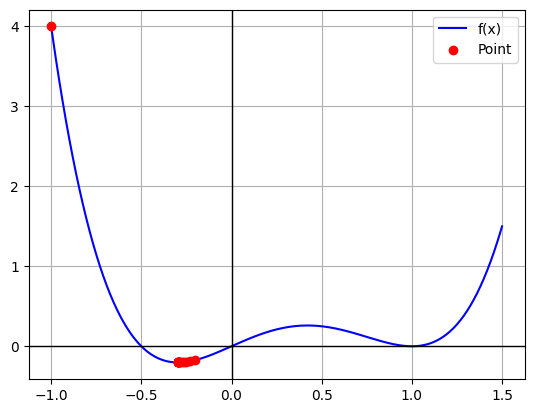

In [322]:

x, it = GD(func, x0 = -1, eta = 0.05)
print(f"Iteration : {it}")
print(f"Best Point: {x[-1]}")
print(f"Best Value: {func(x[-1])}")
draw(func, x, -1, 1.5, show_point=True)

Iteration : 18
Best Point: 1.0001810517665972
Best Value: 9.836890280112698e-08


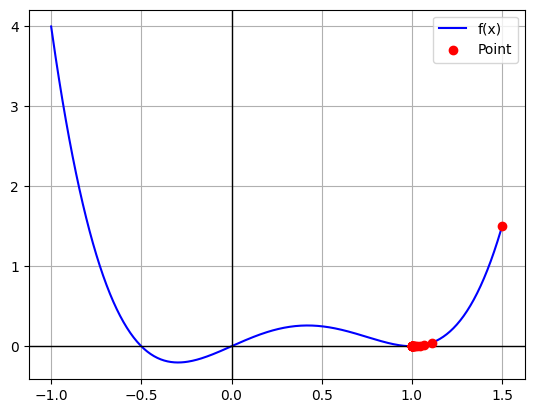

In [323]:
x, it = GD(func, x0 = 1.5, eta = 0.05)
print(f"Iteration : {it}")
print(f"Best Point: {x[-1]}")
print(f"Best Value: {func(x[-1])}")
draw(func, x, -1, 1.5, show_point=True)